In [11]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle

plt.rcParams["figure.figsize"] = (20,15)

In [31]:
bckfile1 = open ("qcd_100000_pt_250_500.pkl",'rb')
background1 = pickle.load(bckfile1)

bckfile2 = open ("qcd_100000_pt_1000_1200.pkl",'rb')
background2 = pickle.load(bckfile2)

background1.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [32]:
datafile1 = open ("higgs_100000_pt_250_500.pkl",'rb')
signal1 = pickle.load(datafile1)

datafile2 = open ("higgs_100000_pt_1000_1200.pkl",'rb')
signal2 = pickle.load(datafile2)

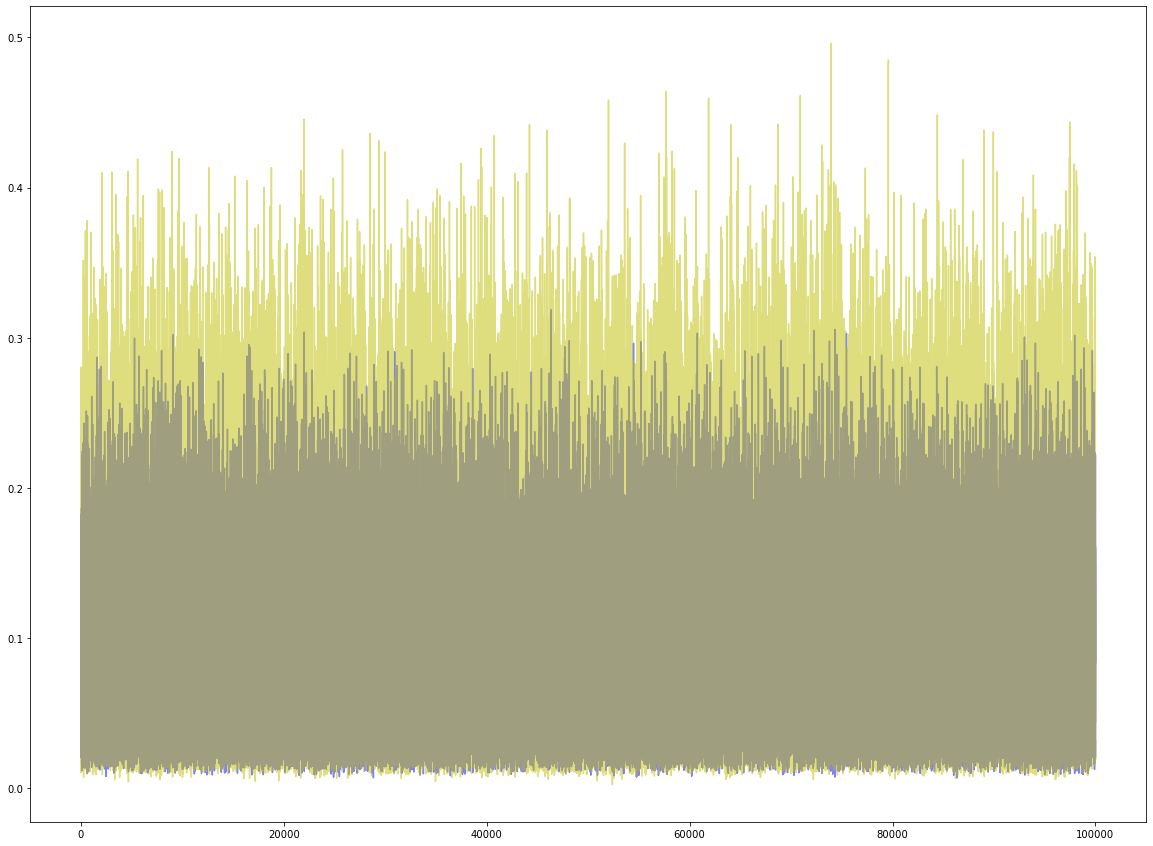

In [40]:
plt.plot(signal1['ee2'], color = 'b', alpha = 0.5)
plt.plot(background1['ee2'], color = 'y', alpha = 0.5)
plt.show()

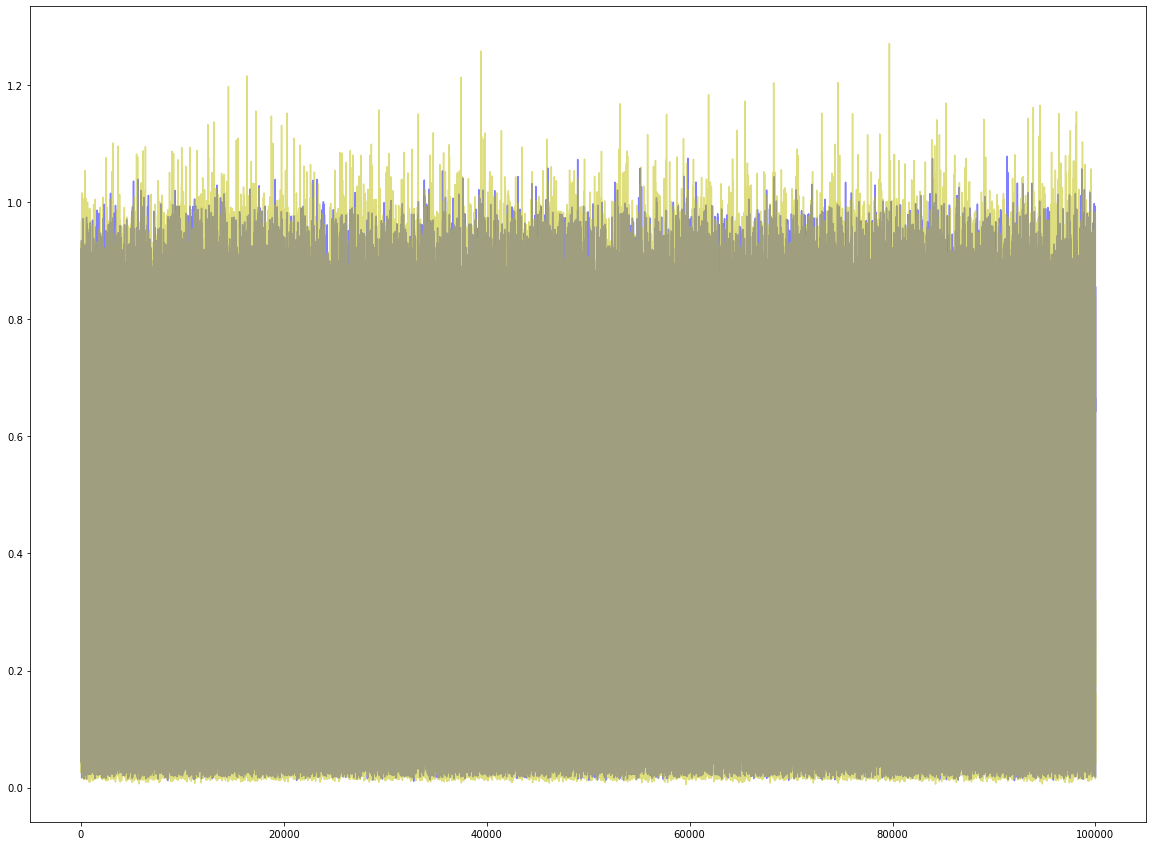

In [36]:
plt.plot(signal1['KtDeltaR'], color = 'b', alpha = 0.5)
plt.plot(background1['KtDeltaR'], color = 'y', alpha = 0.5)
plt.show()

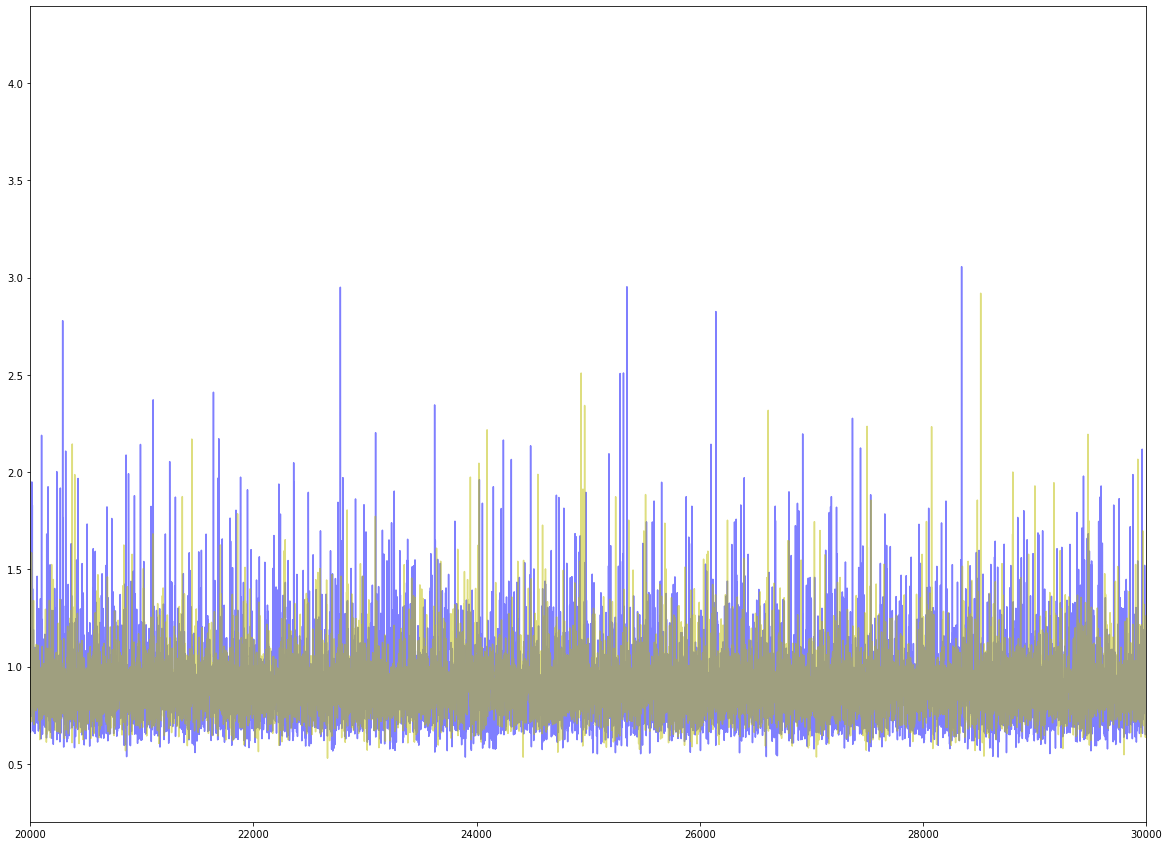

In [37]:
plt.plot(signal1['t1'], color = 'b', alpha = 0.5)
plt.plot(background1['t1'], color = 'y', alpha = 0.5)
plt.xlim(20000,30000)
plt.show()

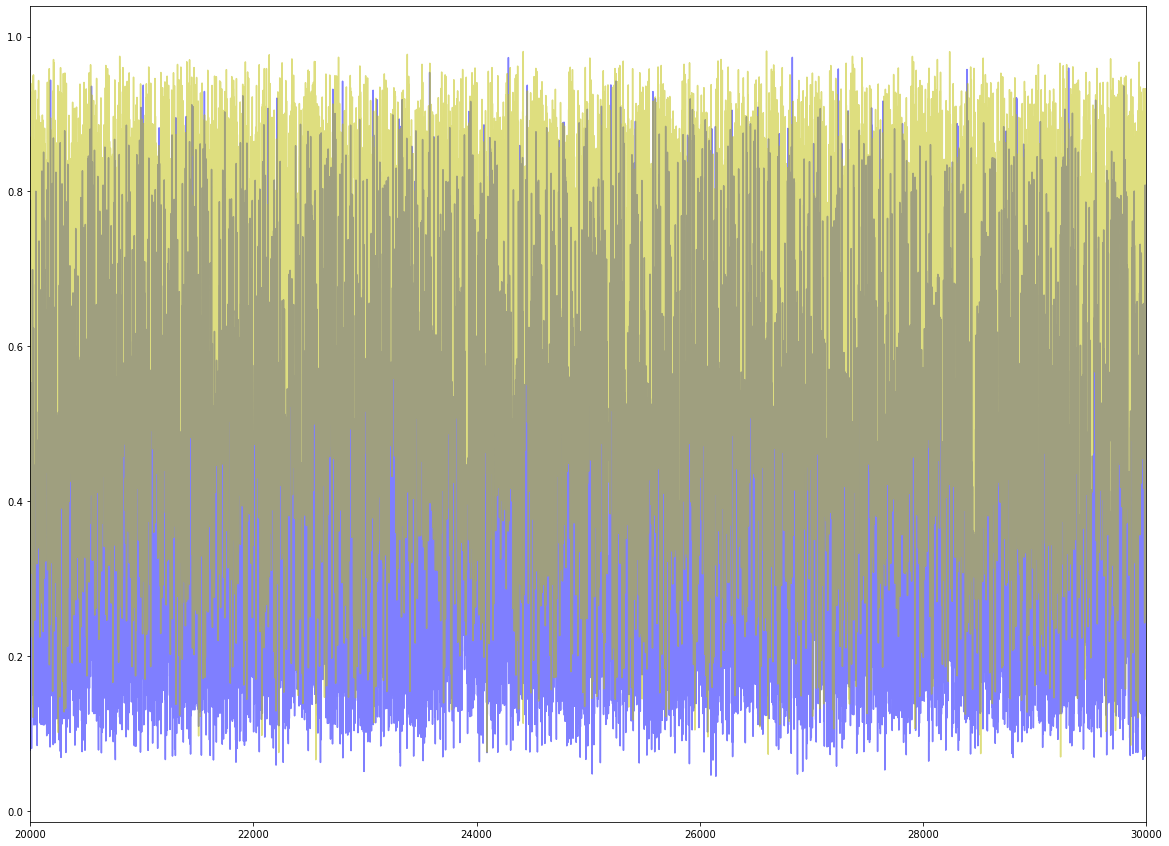

In [39]:
plt.plot(signal1['t21'], color = 'b', alpha = 0.5)
plt.plot(background1['t21'], color = 'y', alpha = 0.5)
plt.xlim(20000,30000)
plt.show()